In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import gensim
import gensim.models.ldamodel
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import CoherenceModel
from gensim import corpora
from wordcloud import WordCloud

In [12]:
with open("/kaggle/input/cluster-dataset/20_newsgroups/20_newsgroups/alt.atheism/49960",'r',encoding='latin') as f:
    f.read()

In [13]:
texts = []
labels = []
base_dir = ["/kaggle/input/cluster-dataset/20_newsgroups","/kaggle/input/cluster-dataset/mini_newsgroups"]
for dirs in base_dir: 
   for root, dirs, files in os.walk(dirs):
       for file in files:
           file_path = os.path.join(root, file)
           try:
               with open(file_path, 'r', encoding='latin-1') as f:
                   texts.append(f.read())
                   labels.append(os.path.basename(root))  # folder name = label
           except:
               continue

In [14]:
import pandas as pd
df = pd.DataFrame({'text': texts, 'label': labels})


In [15]:
df.shape

(21997, 2)

In [16]:
df.head(7)

,text,label
0,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian
1,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,soc.religion.christian
2,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian
3,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,soc.religion.christian
5,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,soc.religion.christian
6,Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...,soc.religion.christian


In [39]:
df['text'][1]

"Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!newsserver.jvnc.net!rutgers!igor.rutgers.edu!athos.rutgers.edu!christian\nFrom: kene@acs.bu.edu (Kenneth Engel)\nNewsgroups: soc.religion.christian\nSubject: Re: Atheists and Hell\nMessage-ID: <May.9.05.39.42.1993.27439@athos.rutgers.edu>\nDate: 9 May 93 09:39:43 GMT\nSender: hedrick@athos.rutgers.edu\nOrganization: Boston University, Boston, MA, USA\nLines: 18\nApproved: christian@aramis.rutgers.edu\n\n|> Imagine the worst depth of despair you've\n|> ever encountered, or the worst physical pain you've ever experienced.\n|> Some people suffer such emotional, physical, and mental anguish\n|> in their lives that their deaths seem to be merciful. But at least\n|> the pain does end in death. What if you lived a hundred such lives,\n|> at the conclusion of one you were instantly reborn into another?\n|> What if you lived a million, a billion years in this state?\n|> What if this kept going forever?\n\n

In [18]:
df['label'][0]

'soc.religion.christian'

In [19]:
df['label'].value_counts()

label
talk.politics.misc          1100
rec.motorcycles             1100
talk.politics.mideast       1100
sci.electronics             1100
comp.sys.ibm.pc.hardware    1100
sci.space                   1100
rec.sport.baseball          1100
misc.forsale                1100
talk.politics.guns          1100
sci.med                     1100
comp.sys.mac.hardware       1100
rec.sport.hockey            1100
comp.os.ms-windows.misc     1100
talk.religion.misc          1100
sci.crypt                   1100
comp.windows.x              1100
comp.graphics               1100
rec.autos                   1100
alt.atheism                 1100
soc.religion.christian      1097
Name: count, dtype: int64

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
#applying Lemmatizer 
lem = WordNetLemmatizer()

In [43]:
import re

corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [50]:
corpus[1]

'path cantaloupe srv cs cmu edu das news harvard edu noc near net howland reston ans net newsserver jvnc net rutgers igor rutgers edu athos rutgers edu christian kene acs bu edu kenneth engel newsgroups soc religion christian subject atheists hell message id may athos rutgers edu date may gmt sender hedrick athos rutgers edu organization boston university boston usa lines approved christian aramis rutgers edu imagine worst depth despair ever encountered worst physical pain ever experienced people suffer emotional physical mental anguish lives deaths seem merciful least pain end death lived hundred lives conclusion one instantly reborn another lived million billion years state kept going forever happen jesus think heard lived one day suffering died wages sin paragraph jesus pay sins surprised see moderator let one seriously want reasonable explanation ken'

In [51]:
#convert word into tokens and then apply lemmatization on tokens
tokenized_text = []

def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    return tokens

for doc in corpus:
    tokenized_text.append(tokenize(doc))
    

In [52]:
print(tokenized_text[1])

['path', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'das', 'news', 'harvard', 'edu', 'noc', 'near', 'net', 'howland', 'reston', 'ans', 'net', 'newsserver', 'jvnc', 'net', 'rutgers', 'igor', 'rutgers', 'edu', 'athos', 'rutgers', 'edu', 'christian', 'kene', 'acs', 'bu', 'edu', 'kenneth', 'engel', 'newsgroups', 'soc', 'religion', 'christian', 'subject', 'atheists', 'hell', 'message', 'id', 'may', 'athos', 'rutgers', 'edu', 'date', 'may', 'gmt', 'sender', 'hedrick', 'athos', 'rutgers', 'edu', 'organization', 'boston', 'university', 'boston', 'usa', 'lines', 'approved', 'christian', 'aramis', 'rutgers', 'edu', 'imagine', 'worst', 'depth', 'despair', 'ever', 'encountered', 'worst', 'physical', 'pain', 'ever', 'experienced', 'people', 'suffer', 'emotional', 'physical', 'mental', 'anguish', 'lives', 'deaths', 'seem', 'merciful', 'least', 'pain', 'end', 'death', 'lived', 'hundred', 'lives', 'conclusion', 'one', 'instantly', 'reborn', 'another', 'lived', 'million', 'billion', 'years', 'state', 'ke

In [53]:
#Lemmatizing the tokens
import spacy

nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])

lemmatized_word = []
def lemmatized(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

for doc in tokenized_text:
    lemmatized_word.append(lemmatized(doc))

In [54]:
print(lemmatized_word[1])


['path', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'das', 'news', 'harvard', 'edu', 'noc', 'near', 'net', 'howland', 'reston', 'ans', 'net', 'newsserver', 'jvnc', 'net', 'rutger', 'igor', 'rutgers', 'edu', 'athos', 'rutger', 'edu', 'christian', 'kene', 'acs', 'bu', 'edu', 'kenneth', 'engel', 'newsgroups', 'soc', 'religion', 'christian', 'subject', 'atheist', 'hell', 'message', 'i', 'd', 'may', 'athos', 'rutger', 'edu', 'date', 'may', 'gmt', 'sender', 'hedrick', 'athos', 'rutger', 'edu', 'organization', 'boston', 'university', 'boston', 'usa', 'lines', 'approve', 'christian', 'aramis', 'rutgers', 'edu', 'imagine', 'bad', 'depth', 'despair', 'ever', 'encounter', 'bad', 'physical', 'pain', 'ever', 'experience', 'people', 'suffer', 'emotional', 'physical', 'mental', 'anguish', 'live', 'death', 'seem', 'merciful', 'least', 'pain', 'end', 'death', 'live', 'hundred', 'life', 'conclusion', 'one', 'instantly', 'reborn', 'another', 'live', 'million', 'billion', 'year', 'state', 'keep', 'go', 'for

In [70]:
import json

with open('lemmatized.txt', 'w') as f:
    json.dump(lemmatized_word, f)


In [72]:
with open('lemmatized.txt', 'r') as f:
    lemmatized_words2 = json.load(f)

print(lemmatized_words2[0])
print(len(lemmatized_words2))

['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'soc', 'religion', 'christian', 'path', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'magnesium', 'club', 'cc', 'cmu', 'edu', 'eddie', 'mit', 'edu', 'europa', 'eng', 'gtefsd', 'com', 'howland', 'reston', 'ans', 'net', 'usc', 'cs', 'utexas', 'edu', 'rutger', 'igor', 'rutgers', 'edu', 'athos', 'rutger', 'edu', 'christian', 'eugene', 'bigelow', 'ebay', 'sun', 'com', 'geno', 'newsgroup', 'soc', 'religion', 'christian', 'subject', 'doctrine', 'original', 'sin', 'message', 'i', 'd', 'may', 'athos', 'rutger', 'edu', 'date', 'may', 'gmt', 'sender', 'hedrick', 'athos', 'rutger', 'edu', 'reply', 'eugene', 'bigelow', 'ebay', 'sun', 'com', 'organization', 'sun', 'microsystems', 'inc', 'line', 'approve', 'christian', 'aramis', 'rutgers', 'edu', 'eugen', 'bigelow', 'write', 'also', 'noteworthy', 'consider', 'jesus', 'attitude', 'argument', 'pharisee', 'ot', 'canon', 'john', 'explain', 'follower', 'road', 'emmaus', 'law', 'prophet', 'psalm', 'refer', 'ot'

In [ ]:
dictionary = corpora.Dictionary(lemmatized_word)
corpus_gensim = [dictionary.doc2bow(text) for text in lemmatized_word]

lda_gensim = gensim.models.ldamodel.LdaModel(
    corpus=corpus_gensim,
    id2word=dictionary,
    num_topics=10,
    passes=10,
    random_state=42
)

In [104]:
lda_gensim.save("lda_model.gensim")
# Load the model
# lda_model = LdaModel.load("lda_model.gensim")

In [102]:
# Coherence
coherence_model = CoherenceModel(model=lda_gensim, texts=lemmatized_word, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Coherence Score: 0.6290


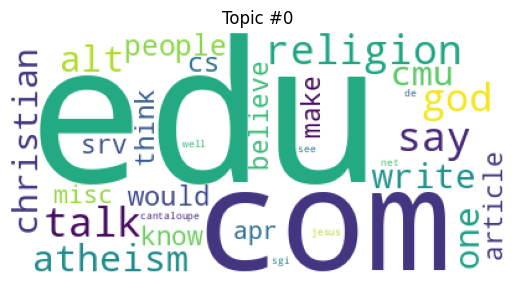

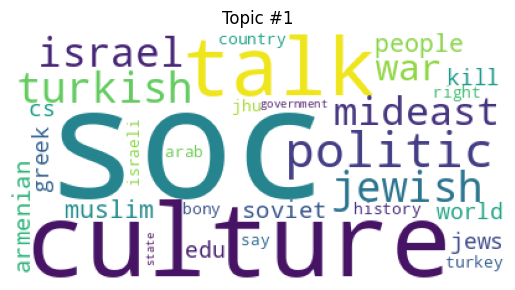

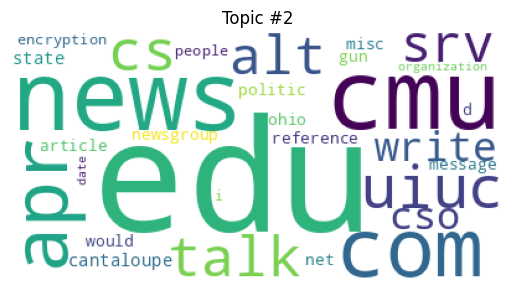

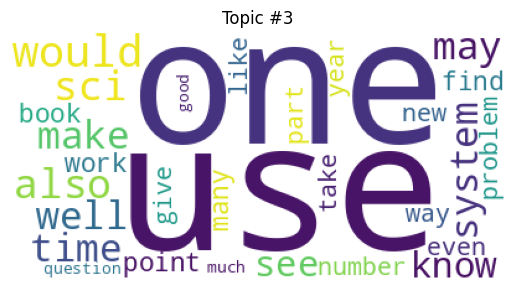

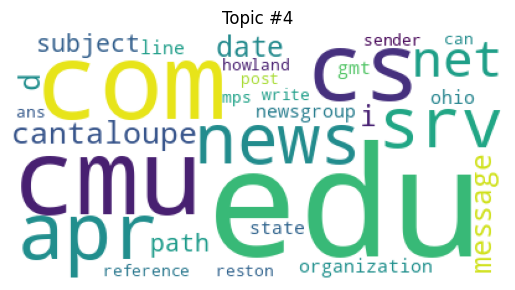

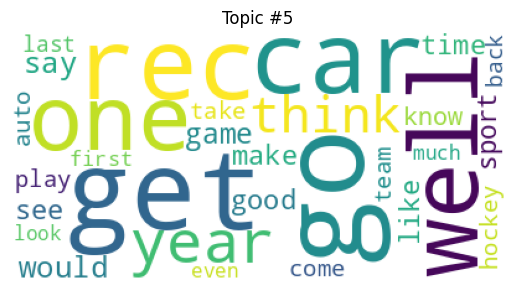

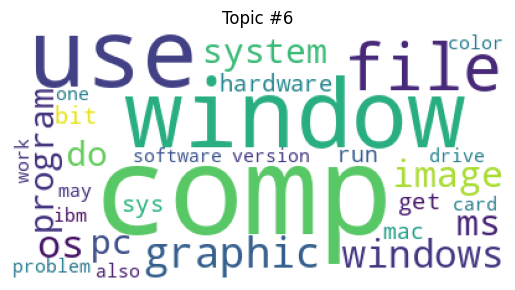

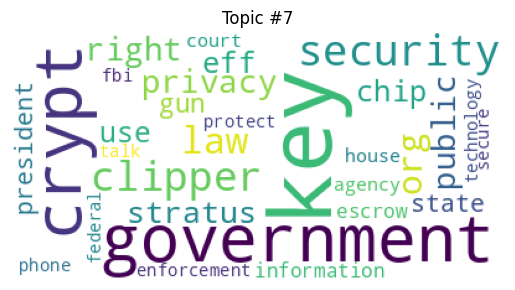

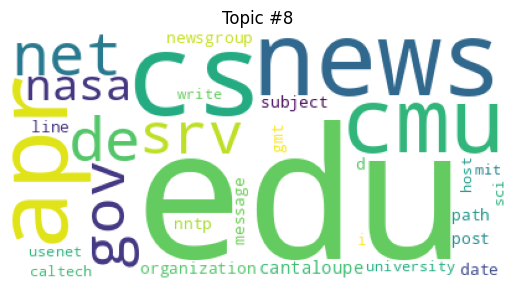

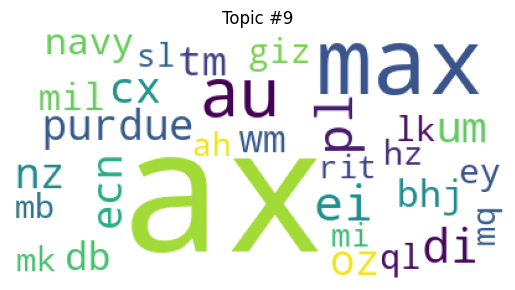

In [106]:
# For each topic in the LDA model
for t in range(lda_gensim.num_topics):
    # Get the top 30 words for the topic
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_gensim.show_topic(t, 30))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [101]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis = gensimvis.prepare(lda_gensim, corpus_gensim, dictionary)
pyLDAvis.display(vis)  # in notebook
